# Load Data

In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Dropout
from keras.layers import Conv2D,BatchNormalization,MaxPooling2D,Reshape
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os


In [2]:
data_folder = './EEG-Data'
os.chdir(data_folder)
print(os.getcwd())

/Users/aaron68lee/Documents/Coding-Projects/EEG-DL/EEG-Data


(2115, 22, 1000)


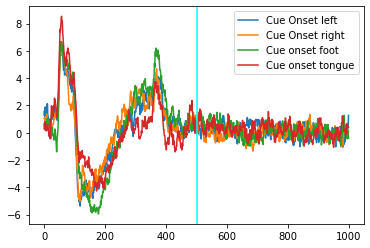

In [3]:
## Loading and visualizing the data

## Loading the dataset

X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_train_valid = np.load("person_train_valid.npy")
X_train_valid = np.load("X_train_valid.npy")
print(X_train_valid.shape)
y_train_valid = np.load("y_train_valid.npy")
person_test = np.load("person_test.npy")

## Adjusting the labels so that 

# Cue onset left - 0
# Cue onset right - 1
# Cue onset foot - 2
# Cue onset tongue - 3

y_train_valid -= 769
y_test -= 769

## Visualizing the data

ch_data = X_train_valid[:,8,:]


class_0_ind = np.where(y_train_valid == 0)
ch_data_class_0 = ch_data[class_0_ind]
avg_ch_data_class_0 = np.mean(ch_data_class_0,axis=0)


class_1_ind = np.where(y_train_valid == 1)
ch_data_class_1 = ch_data[class_1_ind]
avg_ch_data_class_1 = np.mean(ch_data_class_1,axis=0)

class_2_ind = np.where(y_train_valid == 2)
ch_data_class_2 = ch_data[class_2_ind]
avg_ch_data_class_2 = np.mean(ch_data_class_2,axis=0)

class_3_ind = np.where(y_train_valid == 3)
ch_data_class_3 = ch_data[class_3_ind]
avg_ch_data_class_3 = np.mean(ch_data_class_3,axis=0)


plt.plot(np.arange(1000),avg_ch_data_class_0)
plt.plot(np.arange(1000),avg_ch_data_class_1)
plt.plot(np.arange(1000),avg_ch_data_class_2)
plt.plot(np.arange(1000),avg_ch_data_class_3)
plt.axvline(x=500, label='line at t=500',c='cyan')

plt.legend(["Cue Onset left", "Cue Onset right", "Cue onset foot", "Cue onset tongue"])


# Process Raw GDF EEG Data

In [ ]:
data_folder = '/Users/aaron68lee/Documents/Coding-Projects/EEG-DL'
os.chdir(data_folder)
print(os.getcwd())

/Users/aaron68lee/Documents/Coding-Projects/EEG-DL


In [ ]:
# bandpass filter
from numpy import multiply
import mne
from braindecode.datasets import create_from_X_y
from braindecode.preprocessing import (Preprocessor, exponential_moving_standardize, preprocess)
import os, sys

# Redirect standard output to /dev/null
# devnull = open(os.devnull, 'w')
# original_stdout = sys.stdout
# sys.stdout = devnull

# 5, 6, 7, 10, 13, 14 are codes for executed and imagined hands/feet
subject_id = 22
event_codes = [5, 6, 9, 10, 13, 14]
# event_codes = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

folder_path = './BCICIV_2a_gdf' #'./BCICIV_2a_gdf/A01E.gdf' #
file_names = [f for f in os.listdir(folder_path) if f.endswith('.gdf')]
# Load each of the files
parts = [mne.io.read_raw_gdf(os.path.join(folder_path, file), preload=True, stim_channel='auto') for file in file_names]

X = [raw.get_data() for raw in parts]
y = event_codes

#ch_names = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'Oz', 'O2']


Extracting EDF parameters from /Users/aaron68lee/Documents/Coding-Projects/EEG-DL/BCICIV_2a_gdf/A01E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 686999  =      0.000 ...  2747.996 secs...


/opt/miniconda3/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /Users/aaron68lee/Documents/Coding-Projects/EEG-DL/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/opt/miniconda3/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /Users/aaron68lee/Documents/Coding-Projects/EEG-DL/BCICIV_2a_gdf/A07E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 673134  =      0.000 ...  2692.536 secs...


/opt/miniconda3/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /Users/aaron68lee/Documents/Coding-Projects/EEG-DL/BCICIV_2a_gdf/A06T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 678979  =      0.000 ...  2715.916 secs...


/opt/miniconda3/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /Users/aaron68lee/Documents/Coding-Projects/EEG-DL/BCICIV_2a_gdf/A07T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 681070  =      0.000 ...  2724.280 secs...


/opt/miniconda3/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /Users/aaron68lee/Documents/Coding-Projects/EEG-DL/BCICIV_2a_gdf/A06E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 666372  =      0.000 ...  2665.488 secs...


/opt/miniconda3/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /Users/aaron68lee/Documents/Coding-Projects/EEG-DL/BCICIV_2a_gdf/A08T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 675269  =      0.000 ...  2701.076 secs...


/opt/miniconda3/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /Users/aaron68lee/Documents/Coding-Projects/EEG-DL/BCICIV_2a_gdf/A05E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 679862  =      0.000 ...  2719.448 secs...


/opt/miniconda3/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /Users/aaron68lee/Documents/Coding-Projects/EEG-DL/BCICIV_2a_gdf/A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 600914  =      0.000 ...  2403.656 secs...


/opt/miniconda3/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /Users/aaron68lee/Documents/Coding-Projects/EEG-DL/BCICIV_2a_gdf/A09E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 675097  =      0.000 ...  2700.388 secs...


/opt/miniconda3/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /Users/aaron68lee/Documents/Coding-Projects/EEG-DL/BCICIV_2a_gdf/A08E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 687791  =      0.000 ...  2751.164 secs...


/opt/miniconda3/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /Users/aaron68lee/Documents/Coding-Projects/EEG-DL/BCICIV_2a_gdf/A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 686119  =      0.000 ...  2744.476 secs...


/opt/miniconda3/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /Users/aaron68lee/Documents/Coding-Projects/EEG-DL/BCICIV_2a_gdf/A04E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 660046  =      0.000 ...  2640.184 secs...


/opt/miniconda3/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /Users/aaron68lee/Documents/Coding-Projects/EEG-DL/BCICIV_2a_gdf/A09T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 673327  =      0.000 ...  2693.308 secs...


/opt/miniconda3/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /Users/aaron68lee/Documents/Coding-Projects/EEG-DL/BCICIV_2a_gdf/A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 677168  =      0.000 ...  2708.672 secs...


/opt/miniconda3/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /Users/aaron68lee/Documents/Coding-Projects/EEG-DL/BCICIV_2a_gdf/A03E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 648774  =      0.000 ...  2595.096 secs...


/opt/miniconda3/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /Users/aaron68lee/Documents/Coding-Projects/EEG-DL/BCICIV_2a_gdf/A02E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 662665  =      0.000 ...  2650.660 secs...


/opt/miniconda3/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /Users/aaron68lee/Documents/Coding-Projects/EEG-DL/BCICIV_2a_gdf/A03T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 660529  =      0.000 ...  2642.116 secs...


/opt/miniconda3/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [ ]:

# devnull.close()
# sys.stdout = original_stdout
# sys.stdout = sys.__stdout__

sfreq = parts[0].info["sfreq"]
ch_names = parts[0].info["ch_names"]
eeg_channels = [ch for ch in ch_names if ch.startswith('EEG')] # we're only using 22 of 25 channels


dataset = create_from_X_y(
    X_train_valid, y_train_valid, 
    drop_last_window=False,
    sfreq=250, # 250 Hz sampling freq
    ch_names=eeg_channels, # 
    window_stride_samples=500,
    window_size_samples=500,
)
i = 0
x_i, y_i, window_ind = dataset[0]
n_channels, n_times = x_i.shape  # the EEG data
_, start_ind, stop_ind = window_ind
print(f"n_channels={n_channels}  -- n_times={n_times} -- y_i={y_i}")
print(f"start_ind={start_ind} -- stop_ind={stop_ind}")

print("Desc:\n", dataset.description)  # look as dataset description

low_cut_hz = 4.  # low cut frequency for filtering
high_cut_hz = 38.  # high cut frequency for filtering
# Parameters for exponential moving standardization
factor_new = 1e-3
init_block_size = 1000
# Factor to convert from V to uV
factor = 1e6

preprocessors = [
    Preprocessor('pick_types', eeg=True, meg=False, stim=False),  # Keep EEG sensors
    Preprocessor(lambda data: multiply(data, factor)),  # Convert from V to uV optional
    Preprocessor('filter', l_freq=low_cut_hz, h_freq=high_cut_hz),  # Bandpass filter
    # Preprocessor(exponential_moving_standardize,  # Exponential moving standardization
    #              factor_new=factor_new, init_block_size=init_block_size)
]



Creating RawArray with float64 data, n_channels=22, n_times=1000
    Range : 0 ... 999 =      0.000 ...     3.996 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=1000
    Range : 0 ... 999 =      0.000 ...     3.996 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=1000
    Range : 0 ... 999 =      0.000 ...     3.996 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=1000
    Range : 0 ... 999 =      0.000 ...     3.996 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=1000
    Range : 0 ... 999 =      0.000 ...     3.996 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=1000
    Range : 0 ... 999 =      0.000 ...     3.996 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=1000
    Range : 0 ... 999 =      0.000 ...     3.996 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=1000
    Range : 0 ... 999 =      0.000 ...     3.996 secs

/opt/miniconda3/lib/python3.9/site-packages/braindecode/preprocessing/preprocess.py:55: UserWarning: Preprocessing choices with lambda functions cannot be saved.
  warn('Preprocessing choices with lambda functions cannot be saved.')


In [ ]:

# Transform the data
print(f"n_channels={n_channels}  -- n_times={n_times} -- y_i={y_i}")
print(f"start_ind={start_ind} -- stop_ind={stop_ind}")

#preprocess(dataset, preprocessors)

n_channels=22  -- n_times=500 -- y_i=2
start_ind=0 -- stop_ind=500


# Data Preprocessing

In [4]:

## Preprocessing the dataset

X_train_valid_prep = X_train_valid[:,:,0:500]
X_test_prep = X_test[:,:,0:500]

print("X train val prep", X_train_valid_prep.shape)
print("y train val prep", y_train_valid.shape)
print("X test prep", X_test_prep.shape)
print("y test", y_test.shape)


## Random splitting and reshaping the data

# First generating the training and validation indices using random splitting
ind_valid = np.random.choice(2115, 500, replace=False)
ind_train = np.array(list(set(range(2115)).difference(set(ind_valid))))

# Creating the training and validation sets using the generated indices
(x_train, x_valid) = X_train_valid_prep[ind_train], X_train_valid_prep[ind_valid] 
(y_train, y_valid) = y_train_valid[ind_train], y_train_valid[ind_valid]
print('Shape of training set:',x_train.shape)
print('Shape of validation set:',x_valid.shape)
print('Shape of training labels:',y_train.shape)
print('Shape of validation labels:',y_valid.shape)

#print("old y_train", y_train[:10])

# Converting the labels to categorical variables for multiclass classification
y_train = to_categorical(y_train, 4)
y_valid = to_categorical(y_valid, 4)
y_test = to_categorical(y_test, 4)

#print("new y_train", y_train[:10])

print('Shape of training labels after categorical conversion:',y_train.shape)
print('Shape of validation labels after categorical conversion:',y_valid.shape)
print('Shape of test labels after categorical conversion:',y_test.shape)

# Adding width of the segment to be 1
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_valid = x_valid.reshape(x_valid.shape[0], x_valid.shape[1], x_train.shape[2], 1)
x_test = X_test_prep.reshape(X_test_prep.shape[0], X_test_prep.shape[1], X_test_prep.shape[2], 1)
print('Shape of training set after adding width info:',x_train.shape)
print('Shape of validation set after adding width info:',x_valid.shape)
print('Shape of test set after adding width info:',x_test.shape)


# Reshaping the training and validation dataset
x_train = np.swapaxes(x_train, 1,3)
x_train = np.swapaxes(x_train, 1,2)
x_valid = np.swapaxes(x_valid, 1,3)
x_valid = np.swapaxes(x_valid, 1,2)
x_test = np.swapaxes(x_test, 1,3)
x_test = np.swapaxes(x_test, 1,2)

print("X val", x_valid.shape)
print("y val", y_valid.shape)

print('Shape of training set after dimension reshaping:',x_train.shape)
print('Shape of validation set after dimension reshaping:',x_valid.shape)
print('Shape of test set after dimension reshaping:',x_test.shape)

X train val prep (2115, 22, 500)
y train val prep (2115,)
X test prep (443, 22, 500)
y test (443,)
Shape of training set: (1615, 22, 500)
Shape of validation set: (500, 22, 500)
Shape of training labels: (1615,)
Shape of validation labels: (500,)
Shape of training labels after categorical conversion: (1615, 4)
Shape of validation labels after categorical conversion: (500, 4)
Shape of test labels after categorical conversion: (443, 4)
Shape of training set after adding width info: (1615, 22, 500, 1)
Shape of validation set after adding width info: (500, 22, 500, 1)
Shape of test set after adding width info: (443, 22, 500, 1)
X val (500, 500, 1, 22)
y val (500, 4)
Shape of training set after dimension reshaping: (1615, 500, 1, 22)
Shape of validation set after dimension reshaping: (500, 500, 1, 22)
Shape of test set after dimension reshaping: (443, 500, 1, 22)


# Custom ResNet Conv Layer Architecture

In [6]:
from keras.layers import Input, Conv1D, BatchNormalization, Dropout, Activation, Add, Flatten, Dense
from keras.models import Model

def residual_block(x, filters, kernel_size=3, strides=1):
    shortcut = x
    x = Conv1D(filters, kernel_size, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Activation('relu')(x)
    
    x = Conv1D(filters, kernel_size, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    
    return x

# Input layer
input_layer = Input(shape=(500, 1, 22))

# Initial convolutional layer
conv_initial = Conv1D(64, 7, strides=2, padding='same')(input_layer)
conv_initial = BatchNormalization()(conv_initial)
conv_initial = Dropout(0.5)(conv_initial)
conv_initial = Activation('relu')(conv_initial)

# Residual blocks
res_block_1 = residual_block(conv_initial, 64)
res_block_2 = residual_block(res_block_1, 64)

# Flatten and Dense layers
flattened = Flatten()(res_block_2)
output_layer = Dense(4, activation='softmax')(flattened)

# Your ResNet model
resnet_model = Model(inputs=input_layer, outputs=output_layer)
resnet_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 500, 1, 22)  0           []                               
                                ]                                                                 
                                                                                                  
 conv1d (Conv1D)                (None, 500, 1, 64)   9920        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 500, 1, 64)  256         ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [ ]:
# actual resnet-50

from tensorflow.keras.applications import ResNet50

input_shape = ((224, 224, 3))
resnet = ResNet50(include_top=False,
                input_shape=input_shape,
                pooling='avg',
                classes=4,
                weights='imagenet')

for layer in resnet.layers: # freeze base resnet layers
    layer.trainable=False

# Building the custom model on top of Resnet-50 using sequential class
    
custom = Sequential()
custom.add(resnet)

# Output layer with Softmax activation

#custom.add(Dropout(0.5))
custom.add(BatchNormalization())
custom.add(Flatten()) # Flattens the input
custom.add(Dense(256, activation='relu')) 
custom.add(Dense(4, activation='softmax')) # Output FC layer with softmax activation


# Printing the model summary
custom._name = "Tuned ResNet-50"
custom.summary()



Model: "Tuned ResNet-50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization_5 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               524544    
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 24,121,476
Trainable params: 529,668
Non-trainable params: 23,591,808
_________________________________

In [ ]:
# # combined Resnet-50 with residual and FC layers

# from keras.models import Model
# from keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, Flatten, Dense, Dropout
# from keras.applications import ResNet50

# # Input shape for your EEG data
# input_shape = (500, 1, 22)

# # Base ResNet50 model
# resnet = ResNet50(include_top=False,
#                   input_shape=(224, 224, 3),
#                   pooling='avg',
#                   weights='imagenet')

# # Freeze base ResNet50 layers
# for layer in resnet.layers:
#     layer.trainable = False

# # Custom residual block
# def residual_block(x, filters, kernel_size=3, strides=1):
#     shortcut = x
#     x = Conv2D(filters, kernel_size, strides=strides, padding='same')(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters, kernel_size, strides=strides, padding='same')(x)
#     x = BatchNormalization()(x)
#     x = Add()([x, shortcut])
#     x = Activation('relu')(x)
#     return x

# # Custom model using ResNet50 base
# custom_input = Input(shape=input_shape)
# x = custom_input

# x = Reshape((500, 1, 22))(x)  # Assuming the time dimension is 500, and channels are 22

# # Apply your custom residual blocks
# x = residual_block(x, 22)

# # Flatten and add custom dense layers
# x = Flatten()(x)
# x = Dense(256, activation='relu')(x)
# x = Dense(4, activation='softmax')(x)

# # Create the custom model
# custom_model = Model(inputs=custom_input, outputs=x)

# print(resnet.output.shape)
# # Combine the base ResNet50 and custom model
# combined_model = Model(inputs=resnet.input, outputs=custom_model(resnet.output))

# # Print model summary
# combined_model.summary()


In [16]:
# deeper custom resnet-7 

from keras.layers import Input, Conv1D, BatchNormalization, Dropout, Activation, Add, Flatten, Dense
from keras.models import Model

def residual_block(x, filters, kernel_size=3, strides=1):
    shortcut = x
    x = Conv1D(filters, kernel_size, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Activation('relu')(x)
    
    x = Conv1D(filters, kernel_size, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    
    return x

# Input layer
input_layer = Input(shape=(500, 1, 22))

# Initial convolutional layer
conv_initial = Conv1D(128, 7, strides=2, padding='same')(input_layer)
conv_initial = BatchNormalization()(conv_initial)
conv_initial = Dropout(0.5)(conv_initial)
conv_initial = Activation('relu')(conv_initial)

# Residual blocks
res_block_1 = residual_block(conv_initial, 128)
res_block_2 = residual_block(res_block_1, 128)
res_block_3 = residual_block(res_block_2, 128)
res_block_4 = residual_block(res_block_3, 128)

# Flatten and Dense layers
flattened = Flatten()(res_block_4)
output_layer = Dense(4, activation='softmax')(flattened)

# Your deeper ResNet model
deeper_resnet_model = Model(inputs=input_layer, outputs=output_layer)
deeper_resnet_model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 500, 1, 22)  0           []                               
                                ]                                                                 
                                                                                                  
 conv1d_18 (Conv1D)             (None, 500, 1, 128)  19840       ['input_3[0][0]']                
                                                                                                  
 batch_normalization_18 (BatchN  (None, 500, 1, 128)  512        ['conv1d_18[0][0]']              
 ormalization)                                                                                    
                                                                                            

# Custom Resnet-15

In [7]:
# deep resnet-15

# Input layer
input_layer = Input(shape=(500, 1, 22))

# Initial convolutional layer
conv_initial = Conv1D(64, 7, strides=2, padding='same')(input_layer)
conv_initial = BatchNormalization()(conv_initial)
conv_initial = Dropout(0.5)(conv_initial)
conv_initial = Activation('relu')(conv_initial)

# Residual blocks (let's add more blocks)
res_block_1 = residual_block(conv_initial, 64)
res_block_2 = residual_block(res_block_1, 64)
res_block_3 = residual_block(res_block_2, 64)
res_block_4 = residual_block(res_block_3, 64)
res_block_5 = residual_block(res_block_4, 64)
res_block_6 = residual_block(res_block_5, 64)

# Flatten and Dense layers
flattened = Flatten()(res_block_6)
dense_layer_1 = Dense(256, activation='relu')(flattened)
dense_layer_2 = Dense(128, activation='relu')(dense_layer_1)
output_layer = Dense(4, activation='softmax')(dense_layer_2)

# Your deep ResNet model
deep_resnet_model = Model(inputs=input_layer, outputs=output_layer)
deep_resnet_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 500, 1, 22)  0           []                               
                                ]                                                                 
                                                                                                  
 conv1d_5 (Conv1D)              (None, 500, 1, 64)   9920        ['input_2[0][0]']                
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 500, 1, 64)  256         ['conv1d_5[0][0]']               
 rmalization)                                                                                     
                                                                                            

# ResNet-LSTM

In [ ]:
# from keras.layers import Input, Conv1D, BatchNormalization, Dropout, Activation, Flatten, Dense, LSTM
# from keras.models import Model

# def residual_block(x, filters, kernel_size=3, strides=1):
#     shortcut = x
#     x = Conv1D(filters, kernel_size, strides=strides, padding='same')(x)
#     x = BatchNormalization()(x)
#     x = Dropout(0.5)(x)
#     x = Activation('relu')(x)
    
#     x = Conv1D(filters, kernel_size, strides=strides, padding='same')(x)
#     x = BatchNormalization()(x)
#     x = Dropout(0.5)(x)
    
#     x = Add()([x, shortcut])
#     x = Activation('relu')(x)
    
#     return x

# # Input layer
# input_layer = Input(shape=(500, 1, 22))

# # Initial convolutional layer
# conv_initial = Conv1D(64, 7, strides=2, padding='same')(input_layer)
# conv_initial = BatchNormalization()(conv_initial)
# conv_initial = Dropout(0.5)(conv_initial)
# conv_initial = Activation('relu')(conv_initial)

# # Residual blocks
# res_block_1 = residual_block(conv_initial, 64)
# res_block_2 = residual_block(res_block_1, 64)

# # LSTM layers
# lstm_layer_1 = LSTM(64, return_sequences=True)(res_block_2)
# lstm_layer_2 = LSTM(64)(lstm_layer_1)

# # Flatten and Dense layers
# flattened = Flatten()(lstm_layer_2)
# output_layer = Dense(4, activation='softmax')(flattened)

# # Your model
# res_lstm = Model(inputs=input_layer, outputs=output_layer)
# res_lstm.summary()


In [23]:
# # second proposed resnet-lstm architecture

# from keras.layers import Input, Conv1D, BatchNormalization, Dropout, Activation, Add, Flatten, Dense, LSTM
# from keras.models import Model

# def residual_block(x, filters, kernel_size=3, strides=1):
#     shortcut = x
#     x = Conv1D(filters, kernel_size, strides=strides, padding='same')(x)
#     x = BatchNormalization()(x)
#     x = Dropout(0.5)(x)
#     x = Activation('relu')(x)
    
#     x = Conv1D(filters, kernel_size, strides=strides, padding='same')(x)
#     x = BatchNormalization()(x)
#     x = Dropout(0.5)(x)
    
#     x = Add()([x, shortcut])
#     x = Activation('relu')(x)
    
#     return x

# # Input layer
# input_layer = Input(shape=(500, 1, 22))

# # Initial convolutional layer
# conv_initial = Conv1D(64, 7, strides=2, padding='same')(input_layer)
# conv_initial = BatchNormalization()(conv_initial)
# conv_initial = Dropout(0.5)(conv_initial)
# conv_initial = Activation('relu')(conv_initial)

# # Residual blocks with LSTM layers
# res_block_1 = residual_block(conv_initial, 64)
# lstm_layer_1 = LSTM(64, return_sequences=True)(res_block_1)
# res_block_2 = residual_block(lstm_layer_1, 64)
# lstm_layer_2 = LSTM(64, return_sequences=True)(res_block_2)

# # Flatten and Dense layers
# flattened = Flatten()(lstm_layer_2)
# output_layer = Dense(4, activation='softmax')(flattened)

# # Your ResNet with LSTM model
# resnet_lstm_model = Model(inputs=input_layer, outputs=output_layer)
# resnet_lstm_model.summary()


ValueError: Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, 500, 1, 64)

# Pre-trained EEGNetV4 Model

In [ ]:
import torch

from braindecode.models import ShallowFBCSPNet
from braindecode.util import set_random_seeds
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

cuda = torch.cuda.is_available()  # check if GPU is available, if True chooses to use it
device = 'cuda' if cuda else 'cpu'
if cuda:
    torch.backends.cudnn.benchmark = True
# Set random seed to be able to roughly reproduce results
# Note that with cudnn benchmark set to True, GPU indeterminism
# may still make results substantially different between runs.
# To obtain more consistent results at the cost of increased computation time,
# you can set `cudnn_benchmark=False` in `set_random_seeds`
# or remove `torch.backends.cudnn.benchmark = True`
    
seed = 20200220
set_random_seeds(seed=seed, cuda=cuda)

n_classes = 4

model = ShallowFBCSPNet(
    22,
    n_classes,
    input_window_samples=500,
    final_conv_length='auto',
)
# input: (1615, 500, 1, 22)

# Display torchinfo table describing the model
print(model)

Layer (type (var_name):depth-idx)        Input Shape               Output Shape              Param #                   Kernel Shape
ShallowFBCSPNet (ShallowFBCSPNet)        [1, 22, 500]              [1, 4]                    --                        --
├─Ensure4d (ensuredims): 1-1             [1, 22, 500]              [1, 22, 500, 1]           --                        --
├─Rearrange (dimshuffle): 1-2            [1, 22, 500, 1]           [1, 1, 500, 22]           --                        --
├─CombinedConv (conv_time_spat): 1-3     [1, 1, 500, 22]           [1, 40, 476, 1]           36,240                    --
├─BatchNorm2d (bnorm): 1-4               [1, 40, 476, 1]           [1, 40, 476, 1]           80                        --
├─Expression (conv_nonlin_exp): 1-5      [1, 40, 476, 1]           [1, 40, 476, 1]           --                        --
├─AvgPool2d (pool): 1-6                  [1, 40, 476, 1]           [1, 40, 27, 1]            --                        [75, 1]
├─Express

/opt/miniconda3/lib/python3.9/site-packages/braindecode/models/base.py:23: UserWarning: ShallowFBCSPNet: 'input_window_samples' is depreciated. Use 'n_times' instead.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


# Train Resnet Model

In [9]:
###################### hyperparams and settings #######################
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Model parameter
decay_steps = 1000
initial_learning_rate = 0.1
# learning_rate = keras.optimizers.schedules.CosineDecay(
#     initial_learning_rate, decay_steps)
learning_rate = 1e-1

epochs = 100
# cnn_optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8,
                              patience=20, min_lr=5e-5)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks=[reduce_lr, early_stopping]

In [17]:

# Compile the model
from keras.optimizers import Adam
model = deeper_resnet_model #resnet_model
#print(model.summary())
model.compile(optimizer=Adam(learning_rate=5e-4), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

print(x_valid.shape)
print(y_valid.shape)

# convert labels back to categorial
y_train_categorical = np.argmax(y_train, axis=1)
y_valid_categorical = np.argmax(y_valid, axis=1)
y_test_categorical = np.argmax(y_test, axis=1)

# Train your model with the EarlyStopping callback
history = model.fit(
    x_train, y_train_categorical,  # replace with your training data
    epochs=epochs,        # or any number of epochs
    validation_data=(x_valid, y_valid_categorical),  # replace with your validation data
    callbacks=callbacks  # include the EarlyStopping callback
)

#plot_model(model, to_file='./Gallery/Resnet.png', show_shapes=True, show_layer_names=True)

(500, 500, 1, 22)
(500, 4)
Epoch 1/100
51/51 [==============================] - 67s 1s/step - loss: 10.3023 - accuracy: 0.2563 - val_loss: 4.5097 - val_accuracy: 0.3080 - lr: 5.0000e-04
Epoch 2/100
51/51 [==============================] - 64s 1s/step - loss: 4.4330 - accuracy: 0.3622 - val_loss: 2.8370 - val_accuracy: 0.3600 - lr: 5.0000e-04
Epoch 3/100
51/51 [==============================] - 58s 1s/step - loss: 4.0218 - accuracy: 0.4050 - val_loss: 2.3357 - val_accuracy: 0.4200 - lr: 5.0000e-04
Epoch 4/100
51/51 [==============================] - 49s 956ms/step - loss: 2.9239 - accuracy: 0.4619 - val_loss: 2.6989 - val_accuracy: 0.3680 - lr: 5.0000e-04
Epoch 5/100
51/51 [==============================] - 50s 988ms/step - loss: 2.9953 - accuracy: 0.4718 - val_loss: 2.8691 - val_accuracy: 0.4140 - lr: 5.0000e-04
Epoch 6/100
51/51 [==============================] - 52s 1s/step - loss: 3.1836 - accuracy: 0.4966 - val_loss: 3.1975 - val_accuracy: 0.4140 - lr: 5.0000e-04
Epoch 7/100
51/51 

# Load / Save Model

In [20]:
from keras.models import save_model

# Save entire model
model_filename = '../Models/resnet-7.h5'
model.save(model_filename)

# Save weights only
weights_filename = '../Models/resnet-7_weights.h5'
model.save_weights(weights_filename)

# Load weights into a new model with the same architecture
# loaded_model = create_resnet_lstm_model() # create using resnet-15 architecture
# loaded_model.load_weights(weights_filename)



# Train EEGv4 Model

In [ ]:
from skorch.callbacks import LRScheduler
from skorch.helper import predefined_split

from braindecode import EEGClassifier

lr = 0.0625 * 0.01
weight_decay = 0

# For deep4 they should be:
# lr = 1 * 0.01
# weight_decay = 0.5 * 0.001

batch_size = 64
n_epochs = 4

# print(x_valid[0].shape)
# print(y_valid[0].shape)

# print(x_train[0].shape)
# print(y_train[0].shape)
# print(y_train[0])

# reshape x data for EEGV4

# Check the shapes
print("Original shapes:")
print("X_train:", x_train.shape)
print("X_val:", x_valid.shape)
print("X_test:", x_test.shape)


# X_train: (1615, 500, 1, 22)
# needed : (1615, 1, 22, 500)
# needed input shape for EEGv4: 

new_shape = (0, 2, 3, 1)
#new_shape = (0, 3, 1, 2)
X_train_reshaped = np.transpose(x_train, new_shape)
X_val_reshaped = np.transpose(x_valid, new_shape)
X_test_reshaped = np.transpose(x_test, new_shape)

print("\nReshaped shapes:")
print("X_train_reshaped:", X_train_reshaped.shape)
print("X_val_reshaped:", X_val_reshaped.shape)
print("X_test_reshaped:", X_test_reshaped.shape)

print("\nX_train_prep:", X_train_valid.shape)
print("X_train_valid_prep:", X_train_valid_prep.shape)
print("\nTraining on EEGv4")

clf = EEGClassifier(
    model,
    criterion=torch.nn.NLLLoss,
    optimizer=torch.optim.AdamW,
    train_split=predefined_split(x_valid),  # using valid_set for validation
    optimizer__lr=lr,
    optimizer__weight_decay=weight_decay,
    batch_size=batch_size,
    callbacks=[
        "accuracy", ("lr_scheduler", LRScheduler('CosineAnnealingLR', T_max=n_epochs - 1)),
    ],
    device=device,
    classes=n_classes,
)
# Model training for the specified number of epochs. `y` is None as it is
# already supplied in the dataset.

#_ = clf.fit(X=X_train_valid_prep, y=y_train_valid, epochs=n_epochs)
#_ = clf.fit(X=X_train_reshaped, y=y_train, epochs=n_epochs)

Original shapes:
X_train: (1615, 500, 1, 22)
X_val: (500, 500, 1, 22)
X_test: (443, 500, 1, 22)

Reshaped shapes:
X_train_reshaped: (1615, 1, 22, 500)
X_val_reshaped: (500, 1, 22, 500)
X_test_reshaped: (443, 1, 22, 500)

X_train_prep: (2115, 22, 1000)
X_train_valid_prep: (2115, 22, 500)

Training on EEGv4


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

# Extract loss and accuracy values for plotting from history object
results_columns = ['train_loss', 'valid_loss', 'train_accuracy', 'valid_accuracy']
df = pd.DataFrame(clf.history[:, results_columns], columns=results_columns,
                  index=clf.history[:, 'epoch'])

# get percent of misclass for better visual comparison to loss
df = df.assign(train_misclass=100 - 100 * df.train_accuracy,
               valid_misclass=100 - 100 * df.valid_accuracy)

fig, ax1 = plt.subplots(figsize=(8, 3))
df.loc[:, ['train_loss', 'valid_loss']].plot(
    ax=ax1, style=['-', ':'], marker='o', color='tab:blue', legend=False, fontsize=14)

ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=14)
ax1.set_ylabel("Loss", color='tab:blue', fontsize=14)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

df.loc[:, ['train_misclass', 'valid_misclass']].plot(
    ax=ax2, style=['-', ':'], marker='o', color='tab:red', legend=False)
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=14)
ax2.set_ylabel("Misclassification Rate [%]", color='tab:red', fontsize=14)
ax2.set_ylim(ax2.get_ylim()[0], 85)  # make some room for legend
ax1.set_xlabel("Epoch", fontsize=14)

# where some data has already been plotted to ax
handles = []
handles.append(Line2D([0], [0], color='black', linewidth=1, linestyle='-', label='Train'))
handles.append(Line2D([0], [0], color='black', linewidth=1, linestyle=':', label='Valid'))
plt.legend(handles, [h.get_label() for h in handles], fontsize=14)
plt.tight_layout()

# Performance

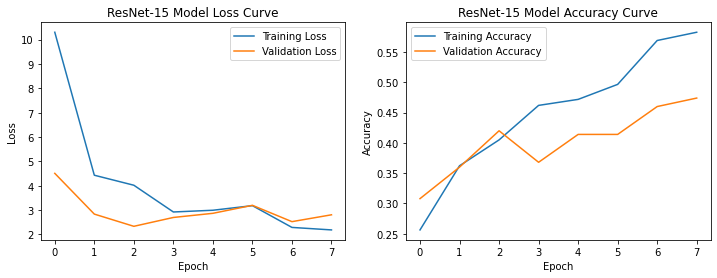

In [18]:
#history = history_cnn_lstm

# Plotting the loss curve and accuracy curve
plt.figure(figsize=(12, 4))

model_name = "ResNet-7 Model" #model._name if model._name else "Resnet Model"

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(f'{model_name} Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig(f'../Gallery/{model_name} loss.png', dpi=150)
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title(f'{model_name} Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig(f'../Gallery/{model_name} accuracy.png', dpi=150)
plt.legend()

plt.show()

16/16 [==============================] - 5s 297ms/step
Test accuracy of the custom model: 0.4040631949901581


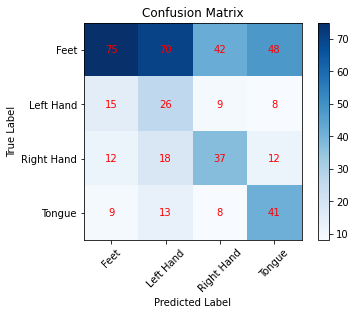

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes):
    """
    Plot confusion matrix.

    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    - classes: List of class names
    """
    cm = np.zeros((len(classes), len(classes)), dtype=int)
    for true, pred in zip(y_true, y_pred):
        #print(true, pred)
        cm[true, pred] += 1

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='red')

    # Save the figure under the 'Gallery' folder
    plt.savefig('../Gallery/resnet-7_confusion_matrix.png')
    plt.show()

# Assuming y_valid is one-hot encoded and y_val_pred_classes are categorical labels
    
y_test_pred = model.predict(x_test)
y_val_pred = model.predict(x_valid)

y_valid_categorical = np.argmax(y_valid, axis=1)
y_val_pred_categorical = np.argmax(y_val_pred, axis=1)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# List of class names (adjust as per your dataset)
class_names = ['Feet', 'Left Hand', 'Right Hand', 'Tongue']

# Plot confusion matrix
true_labels = np.argmax(y_test, axis=1)

## Testing 

score = model.evaluate(x_test, y_test_categorical, verbose=0)
print('Test accuracy of the custom model:',score[1])

plot_confusion_matrix(y_test_pred_classes, true_labels, class_names)


1
0
              precision    recall  f1-score   support

           0       0.36      0.70      0.48       139
           1       0.41      0.21      0.28       116
           2       0.48      0.33      0.39       125
           3       0.53      0.40      0.46       120

    accuracy                           0.42       500
   macro avg       0.45      0.41      0.40       500
weighted avg       0.45      0.42      0.40       500



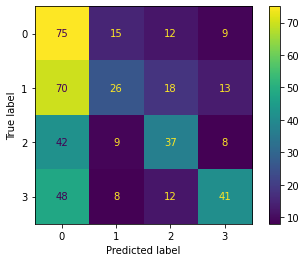

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Assume you have already defined your model and obtained predictions
# ...

# Generate confusion matrix
print(true_labels[0])
print(y_test_pred_classes[0])

conf_mat = confusion_matrix(true_labels, y_test_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.arange(4))
disp.plot(cmap='viridis', values_format='d')

# Print the classification report
report = classification_report(y_valid_categorical, y_val_pred_categorical, target_names=np.arange(4).astype(str))
print(report)

# Save the figure under the 'Gallery' folder
plt.savefig('../Gallery/resnet-15_confusion_matrix2.png')
plt.show()


In [ ]:
# from sklearn.metrics import confusion_matrix

# from braindecode.visualization import plot_confusion_matrix

# # generate confusion matrices
# # get the targets
# y_true = valid_set.get_metadata().target
# y_pred = clf.predict(valid_set)

# # generating confusion matrix
# confusion_mat = confusion_matrix(y_true, y_pred)

# # add class labels
# # label_dict is class_name : str -> i_class : int
# label_dict = windows_dataset.datasets[0].window_kwargs[0][1]['mapping']
# # sort the labels by values (values are integer class labels)
# labels = [k for k, v in sorted(label_dict.items(), key=lambda kv: kv[1])]

# # plot the basic conf. matrix
# plot_confusion_matrix(confusion_mat, class_names=labels)